In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt 
import random 

In [2]:
def imshow(title = 'image', image = None , size = 5):
    w,h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(aspect_ratio*size,size))
    plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

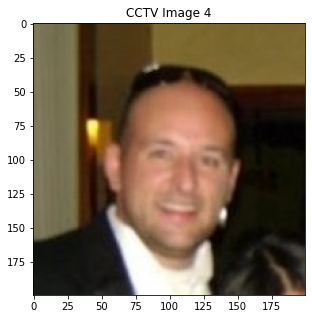

[[[ 82 113 122]
  [ 83 114 123]
  [ 85 116 125]
  ...
  [ 48 103 124]
  [ 48 103 124]
  [ 48 103 124]]

 [[ 84 115 124]
  [ 84 115 124]
  [ 87 118 127]
  ...
  [ 48 103 124]
  [ 49 104 125]
  [ 49 104 125]]

 [[ 85 116 125]
  [ 86 117 126]
  [ 88 119 128]
  ...
  [ 49 104 125]
  [ 49 104 125]
  [ 49 104 125]]

 ...

 [[ 22  25  23]
  [ 21  24  22]
  [ 21  24  22]
  ...
  [ 54  80 117]
  [ 53  76 114]
  [ 52  76 112]]

 [[ 22  25  23]
  [ 22  25  23]
  [ 22  25  23]
  ...
  [ 68  94 134]
  [ 65  90 130]
  [ 62  88 125]]

 [[ 22  25  23]
  [ 22  25  23]
  [ 22  25  23]
  ...
  [ 79 107 148]
  [ 76 102 142]
  [ 71  97 137]]]


In [26]:
noisy_image=cv2.imread("C:\\Users\\baksh\\Desktop\\WhatsApp Image 2023-03-14 at 10.53.38.jpg")
imshow('CCTV Image 4', noisy_image)
print(noisy_image)

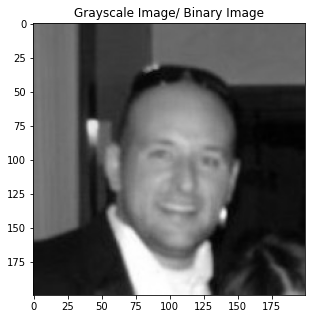

[[112 113 115 ... 103 103 103]
 [114 114 117 ... 103 104 104]
 [115 116 118 ... 104 104 104]
 ...
 [ 24  23  23 ...  88  85  84]
 [ 24  24  24 ... 103  99  96]
 [ 24  24  24 ... 116 111 106]]


In [27]:
# converting the image into gray scale
image_gray = cv2.cvtColor(noisy_image, cv2.COLOR_BGR2GRAY)
imshow('Grayscale Image/ Binary Image',image_gray)
print(image_gray)

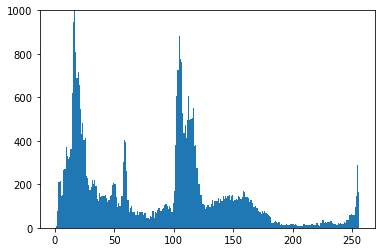

In [23]:
plt.hist(image_gray.ravel(),256,[0,256])
plt.ylim([0,1000])
plt.show()

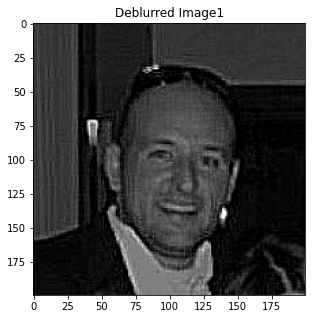

[[ 42  44  50 ...  50  48  46]
 [ 56  49  64 ...  48  56  55]
 [ 56  57  63 ...  54  53  52]
 ...
 [ 17   8   8 ...  39  36  36]
 [ 14  14  14 ...  58  52  36]
 [ 12  12  12 ... 136 126  91]]


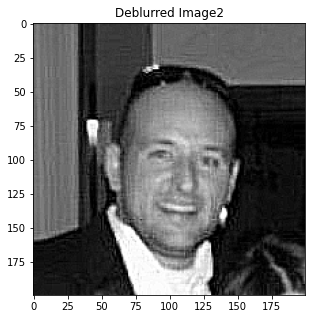

[[ 97  99 106 ... 100  98  96]
 [112 105 121 ...  98 107 106]
 [112 114 121 ... 105 104 103]
 ...
 [ 29  19  19 ...  82  78  77]
 [ 26  26  26 ... 108 101  83]
 [ 24  24  24 ... 193 180 143]]


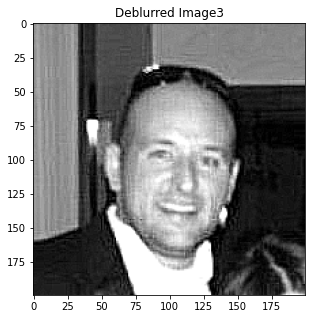

[[132 134 142 ... 132 130 128]
 [147 140 157 ... 130 139 138]
 [148 150 157 ... 137 136 135]
 ...
 [ 36  26  26 ... 109 105 103]
 [ 33  33  33 ... 140 132 113]
 [ 31  31  31 ... 229 214 176]]


In [7]:
kernel1 = np.array([[-1,-1,-1],[-1,8.5,-1],[-1,-1,-1]], np.float32)
kernel2 = np.array([[-1,-1,-1],[-1,8.99,-1],[-1,-1,-1]], np.float32)
kernel3 = np.array([[-1,-1,-1],[-1,9.3,-1],[-1,-1,-1]], np.float32)
image_filtered1 = cv2.filter2D(image_gray,-1, kernel1)
image_filtered2 = cv2.filter2D(image_gray,-1, kernel2)
image_filtered3 = cv2.filter2D(image_gray,-1, kernel3)
imshow('Deblurred Image1', image_filtered1)
print(image_filtered1)
imshow('Deblurred Image2', image_filtered2)
print(image_filtered2)
imshow('Deblurred Image3', image_filtered3)
print(image_filtered3)

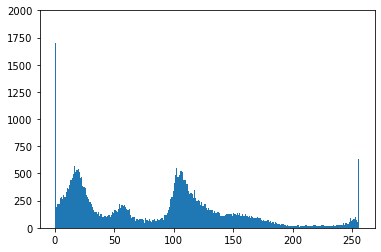

In [22]:
plt.hist(image_filtered2.ravel(),256,[0,256])
plt.ylim([0,2000])
plt.show()

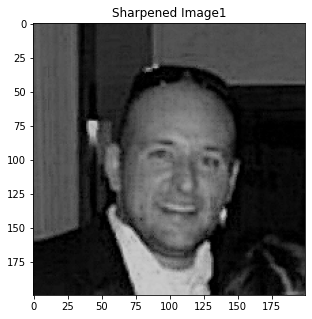

[[78 79 85 ... 80 78 77]
 [80 84 89 ... 78 78 79]
 [90 91 97 ... 80 81 82]
 ...
 [13 15 15 ... 62 62 60]
 [19 17 17 ... 86 81 66]
 [19 19 19 ... 62 56 82]]


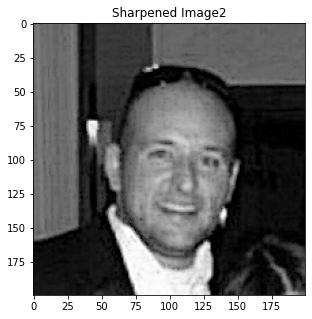

[[ 97  99 106 ... 100  98  96]
 [102 105 113 ...  98  99 100]
 [112 114 121 ... 101 102 103]
 ...
 [ 19  19  19 ...  78  78  75]
 [ 24  22  22 ... 108 101  83]
 [ 24  24  24 ... 101  92 111]]


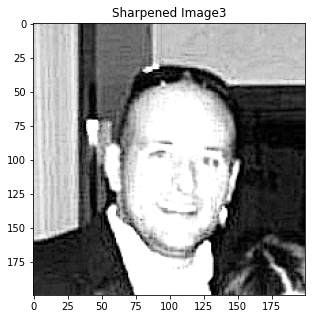

[[184 188 201 ... 190 186 182]
 [203 200 222 ... 186 195 195]
 [213 217 230 ... 196 196 196]
 ...
 [ 45  36  36 ... 152 148 144]
 [ 47  45  45 ... 205 192 158]
 [ 46  46  46 ... 255 254 240]]


In [9]:
blur= cv2.GaussianBlur(image_filtered2,(3,3),0)
image_sharp = cv2.subtract(image_filtered2, blur)
image_sharp1  = cv2.addWeighted(image_filtered2,0.8, image_sharp,-2,0)
image_sharp2  = cv2.addWeighted(image_filtered2,1, image_sharp,-2,0)
image_sharp3  = cv2.addWeighted(image_filtered2,1.9, image_sharp,-2,0)
#image_sharp = cv2.cvtColor(image_sharp, cv2.COLOR_GRAY2BGR)

imshow("Sharpened Image1", image_sharp1)
print(image_sharp1)
imshow("Sharpened Image2", image_sharp2)
print(image_sharp2)
imshow("Sharpened Image3", image_sharp3)
print(image_sharp3)

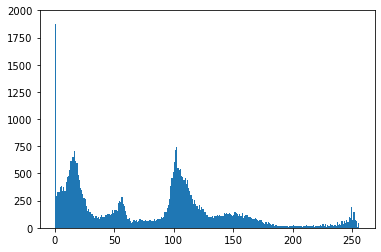

In [21]:
plt.hist(image_sharp2.ravel(),256,[0,256])
plt.ylim([0,2000])
plt.show()

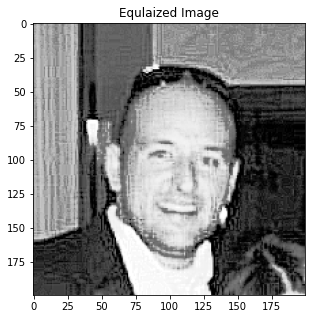

[[126 130 153 ... 133 128 124]
 [170 150 187 ... 128 157 153]
 [170 174 187 ... 150 146 143]
 ...
 [ 71  47  47 ... 115 113 113]
 [ 66  66  66 ... 160 136 115]
 [ 62  62  62 ... 239 236 211]]


In [11]:
equ = cv2.equalizeHist(image_filtered2)
imshow('Equlaized Image',equ)
print(equ)

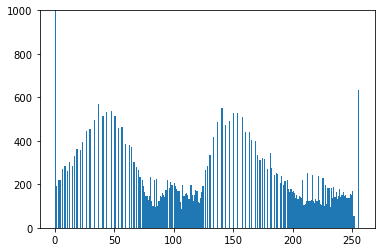

In [20]:
plt.hist(equ.ravel(),256,[0,256])
plt.ylim([0,1000])
plt.show()

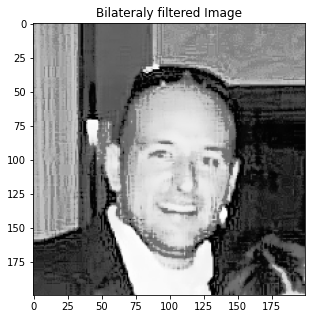

[[131 131 157 ... 135 133 131]
 [173 156 186 ... 133 152 149]
 [172 175 186 ... 148 145 143]
 ...
 [ 63  56  55 ... 112 111 111]
 [ 62  62  63 ... 158 133 113]
 [ 61  61  62 ... 239 239 215]]


In [14]:
image_bfiltered = cv2.bilateralFilter(equ, d=9, sigmaColor = 10, sigmaSpace = 20)
imshow('Bilateraly filtered Image', image_bfiltered)
print(image_bfiltered)

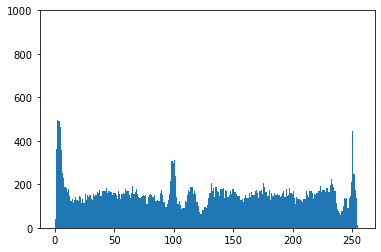

In [19]:
plt.hist(image_bfiltered.ravel(),256,[0,256])
plt.ylim([0,1000])
plt.show()

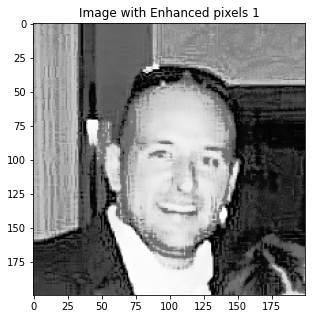

[[132 132 158 ... 136 134 132]
 [174 157 187 ... 134 153 150]
 [173 176 187 ... 149 146 144]
 ...
 [ 64  57  56 ... 113 112 112]
 [ 63  63  64 ... 159 134 114]
 [ 62  62  63 ... 240 240 216]]


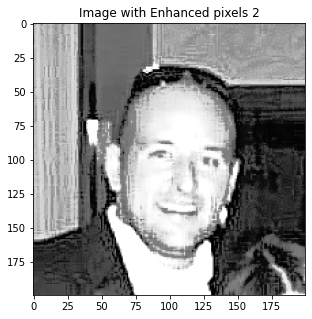

[[145 145 174 ... 150 147 145]
 [191 173 206 ... 147 168 165]
 [190 194 206 ... 164 160 158]
 ...
 [ 70  63  62 ... 124 123 123]
 [ 69  69  70 ... 175 147 125]
 [ 68  68  69 ... 255 255 238]]


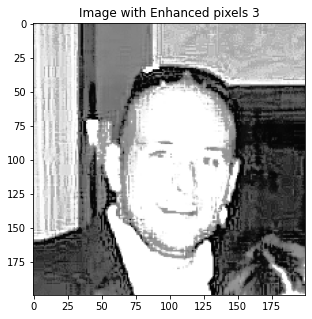

[[172 172 206 ... 178 175 172]
 [227 205 244 ... 175 200 196]
 [226 229 244 ... 194 190 188]
 ...
 [ 84  75  74 ... 148 146 146]
 [ 83  83  84 ... 207 175 149]
 [ 81  81  83 ... 255 255 255]]


In [18]:
alpha1,alpha2,alpha3 = 1.0,1.1,1.3
beta1,beta2,beta3 = 1,1,2
image_enhanced1 = cv2.convertScaleAbs(image_bfiltered, alpha = alpha1 , beta = beta1 )
image_enhanced2 = cv2.convertScaleAbs(image_bfiltered, alpha = alpha2 , beta = beta2 )
image_enhanced3 = cv2.convertScaleAbs(image_bfiltered, alpha = alpha3 , beta = beta3 )
imshow('Image with Enhanced pixels 1', image_enhanced1)
print(image_enhanced1)
imshow('Image with Enhanced pixels 2', image_enhanced2)
print(image_enhanced2)
imshow('Image with Enhanced pixels 3', image_enhanced3)
print(image_enhanced3)

C:\Users\baksh\AppData\Local\Temp\ipykernel_7360\1632262322.py:9: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if face == ():
C:\Users\baksh\AppData\Local\Temp\ipykernel_7360\1632262322.py:21: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if eyes == ():


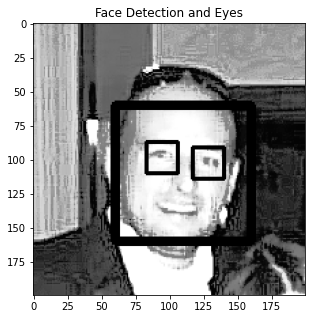

In [24]:
face_classifier = cv2.CascadeClassifier("C:\\Users\\baksh\\Desktop\\Haarcascades\\haarcascade_frontalface_default.xml")
eye_classifier = cv2.CascadeClassifier("C:\\Users\\baksh\\Desktop\\Haarcascades\\haarcascade_eye.xml")

#image = cv2.imread("C:\\Users\\baksh\\Pictures\\IMG_20211204_131154.jpg")
#gray = cv2.cvtColor(image_enhanced,cv2.COLOR_BGR2GRAY)

face = face_classifier.detectMultiScale(image_enhanced2,1.3,minNeighbors=5,minSize =(5,5)) 

if face == ():
    print("No faces found")

for (x,y,w,h) in face:
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(image_enhanced2, 'Face', (x-w, y-h),font,0.5, (0,0, 255),2,cv2.LINE_AA)
    cv2.rectangle(image_enhanced2, (x,y), (x+w,y+h),(0,0,255),5)
    roi_gray= image_enhanced2[y:y+h,x:x+w]
    roi_color=image_enhanced2[y:y+h,x:x+w]
    eyes = eye_classifier.detectMultiScale(roi_gray,1.1,minNeighbors =1, minSize = (1,1))
    for (ex,ey, ew, eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,0,255),2)
        if eyes == ():
            print("Eyes Not detected")
    
imshow('Face Detection and Eyes',image_enhanced2)

In [29]:
face_classifier = cv2.CascadeClassifier("C:\\Users\\baksh\\Desktop\\Haarcascades\\haarcascade_frontalface_default.xml")
eye_classifier = cv2.CascadeClassifier("C:\\Users\\baksh\\Desktop\\Haarcascades\\haarcascade_eye.xml")

#image = cv2.imread("C:\\Users\\baksh\\Pictures\\IMG_20211204_131154.jpg")
#gray = cv2.cvtColor(noisy_image,cv2.COLOR_BGR2GRAY)

face = face_classifier.detectMultiScale(noisy_image,1.3,minNeighbors=5,minSize=(5,5)) 


for (x,y,w,h) in face:
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(noisy_image, 'Face', (x-w, y-h),font,0.5, (127,0, 255),2,cv2.LINE_AA)
    cv2.rectangle(noisy_image, (x,y), (x+w,y+h),(127,0,255),5)
    roi_gray= noisy_image[y:y+h,x:x+w]
    roi_color=noisy_image[y:y+h,x:x+w]
    eyes = eye_classifier.detectMultiScale(roi_gray,1.2,3)
    for (ex,ey, ew, eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,255,0),2)
        
if face == ():
    print("No faces found !!!!!")   
else:
    imshow('Face Detection and Eyes',noisy_image)

No faces found !!!!!
